# Using Built-in Functions in OG-Core

In [1]:
# Import packages
import numpy as np
import pandas as pd
import os
import json
import pickle
from ogcore.parameters import Specifications
from ogcore.execute import runner
import ogcore.output_plots as op
import ogcore.output_tables as ot
import ogcore.demographics as demog
from ogcore.utils import safe_read_pickle
import multiprocessing
from distributed import Client
import matplotlib.pyplot as plt

# set plot style
plt.style.use("ogcore.OGcorePlots")

In [21]:
# Load baseline and reform parameters, steady-state, and transition path
# objects
base_path = r"C:\Users\User\OG-IDN\output\CIT_size\OUTPUT_BASELINE"

ref_path = r"C:\Users\User\OG-IDN\output\CIT_size\OUTPUT_REFORM"

p_bas = pickle.load(open(os.path.join(base_path, "model_params.pkl"), "rb"))
p_ref = pickle.load(open(os.path.join(ref_path, "model_params.pkl"), "rb"))
ss_vars_bas = pickle.load(
    open(os.path.join(base_path, "SS", "SS_vars.pkl"), "rb")
)
ss_vars_ref = pickle.load(
    open(os.path.join(ref_path, "SS", "SS_vars.pkl"), "rb")
)
tpi_vars_bas = pickle.load(
    open(os.path.join(base_path, "TPI", "TPI_vars.pkl"), "rb")
)
tpi_vars_ref = pickle.load(
    open(os.path.join(ref_path, "TPI", "TPI_vars.pkl"), "rb")
)
plot_path=r"C:\Users\User\OG-IDN\output\plots"

## 1. Output_plots.py
Let's look at the [`ogcore/output_plots.py`](https://github.com/PSLmodels/OG-Core/blob/master/ogcore/output_plots.py) module. We have imported this module above with the `import ogcore.output_plots as op` line.

The input arguments for the [`plot_aggregates()`](https://pslmodels.github.io/OG-Core/content/api/output_plots.html) function can be found in the Python API documentation for OG-Core.

```python
plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=None,
    reform_params=None,
    var_list=["Y", "C", "K", "L"],
    plot_type="pct_diff",
    stationarized=True,
    num_years_to_plot=50,
    start_year=DEFAULT_START_YEAR,
    forecast_data=None,
    forecast_units=None,
    vertical_line_years=None,
    plot_title=None,
    path=None,
)
```

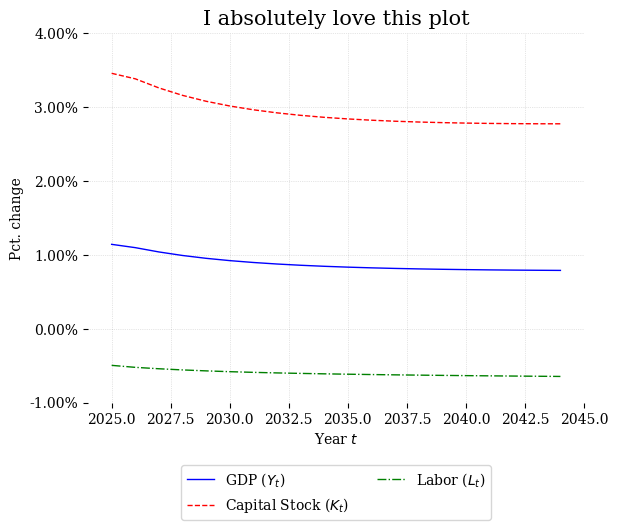

In [23]:
fig1 = op.plot_aggregates(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var_list=["Y", "K", "L"],
    plot_type="pct_diff", num_years_to_plot=20,
    vertical_line_years=None,
    plot_title="I absolutely love this plot"
)
fig1.savefig(os.path.join(plot_path,"YKL_cit.png"),bbox_inches="tight",dpi=300)

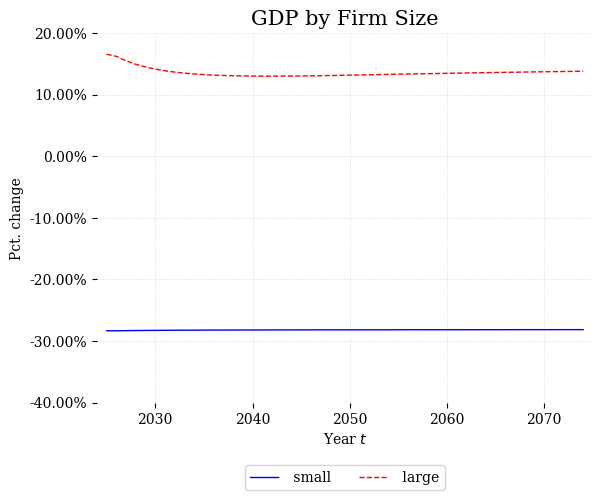

In [24]:
fig1=op.plot_industry_aggregates(tpi_vars_bas,p_bas,tpi_vars_ref,p_ref,ind_names_list=["small","large"],plot_title="GDP by Firm Size")
fig1.savefig(os.path.join(plot_path,"GDP_size.png"),bbox_inches="tight",dpi=300)

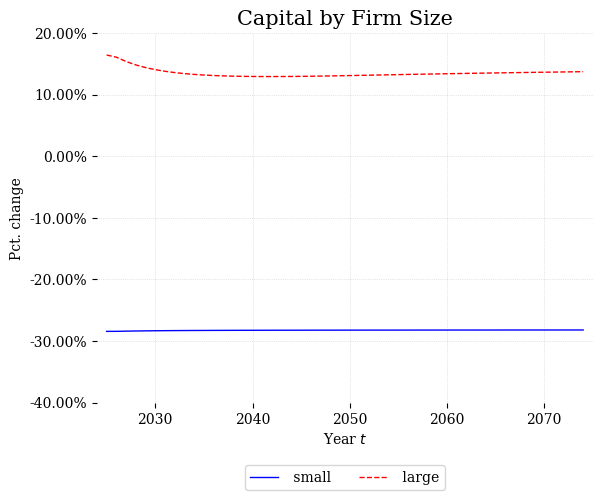

In [25]:
fig1=op.plot_industry_aggregates(tpi_vars_bas,p_bas,tpi_vars_ref,p_ref,var_list=["K_m"],ind_names_list=["small","large"],plot_title="Capital by Firm Size")
fig1.savefig(os.path.join(plot_path,"capital_cit.png"),bbox_inches="tight",dpi=300)

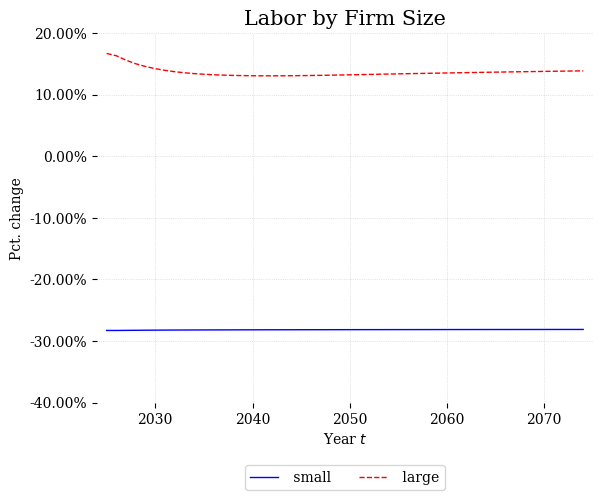

In [26]:
fig1=op.plot_industry_aggregates(tpi_vars_bas,p_bas,tpi_vars_ref,p_ref,var_list=["L_m"],ind_names_list=["small","large"],plot_title="Labor by Firm Size")
fig1.savefig(os.path.join(plot_path,"labor_cit.png"),bbox_inches="tight",dpi=300)

The [`ability_bar()`](https://pslmodels.github.io/OG-Core/content/api/output_plots.html) plot shows percentage change in variables in the first number of years.

```python
ability_bar(
    base_tpi,
    base_params,
    reform_tpi,
    reform_params,
    var="n",
    num_years=5,
    start_year=DEFAULT_START_YEAR,
    plot_title=None,
    path=None,
)
```

The variable `var=` input needs to be one of the variables in the TPI object that varies by ability (e.g., `bmat_splus1`, `bmat_s`, `n_mat`, `c_path`, `bq_path`, `rm_path`, `tr_path`)

In [9]:
tpi_vars_bas.keys()

dict_keys(['Y', 'B', 'K', 'K_f', 'K_d', 'L', 'C', 'I', 'I_total', 'I_d', 'K_g', 'I_g', 'BQ', 'RM', 'Y_m', 'K_m', 'L_m', 'C_i', 'TR', 'agg_pension_outlays', 'G', 'UBI', 'total_tax_revenue', 'business_tax_revenue', 'iit_payroll_tax_revenue', 'iit_revenue', 'payroll_tax_revenue', 'bequest_tax_revenue', 'wealth_tax_revenue', 'cons_tax_revenue', 'D', 'D_f', 'D_d', 'new_borrowing', 'debt_service', 'new_borrowing_f', 'debt_service_f', 'r', 'r_gov', 'r_p', 'w', 'p_m', 'p_i', 'p_tilde', 'b_sp1', 'b_s', 'n', 'c', 'c_i', 'bq', 'rm', 'tr', 'ubi', 'before_tax_income', 'hh_taxes', 'etr', 'mtrx', 'mtry', 'euler_savings', 'euler_labor_leisure', 'resource_constraint_error'])

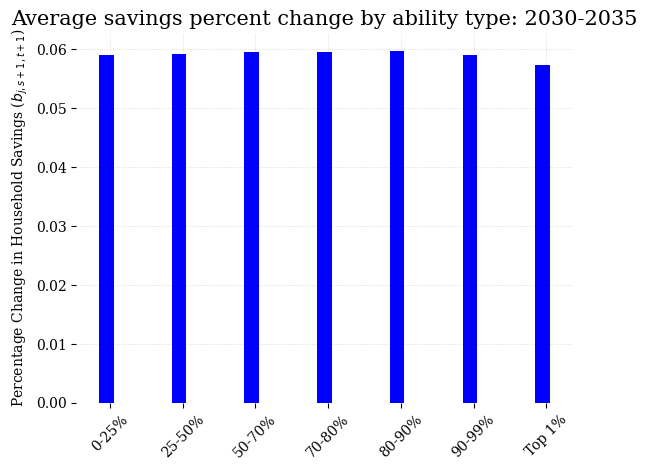

In [13]:
fig2 = op.ability_bar(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var="b_sp1", num_years=5,
    start_year=p_bas.start_year+5,
    plot_title="Average savings percent change by ability type: 2030-2035"
)

The other main plotting function [`plot_gdp_ratio()`](https://pslmodels.github.io/OG-Core/content/api/output_plots.html) is for plotting variables as a percent of GDP.

```python
plot_gdp_ratio(
    base_tpi,
    base_params,
    reform_tpi=None,
    reform_params=None,
    var_list=["D"],
    plot_type="levels",
    num_years_to_plot=50,
    start_year=DEFAULT_START_YEAR,
    vertical_line_years=None,
    plot_title=None,
    path=None,
)
```

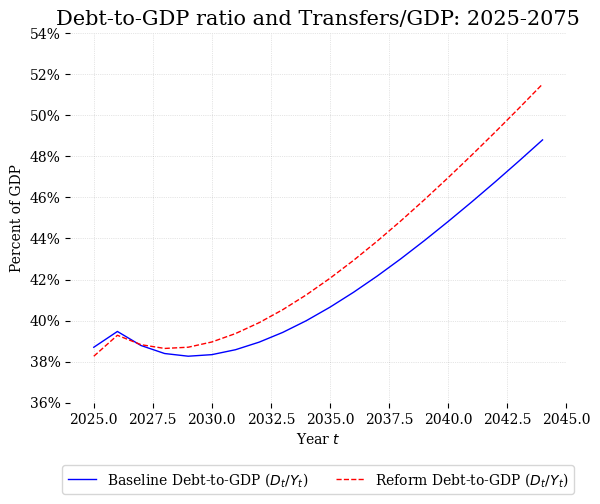

In [15]:
fig3 = op.plot_gdp_ratio(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var_list=["D"], num_years_to_plot=20,
    start_year=p_bas.start_year, plot_type="levels",
    vertical_line_years=None,
    plot_title="Debt-to-GDP ratio and Transfers/GDP: 2025-2075"
)

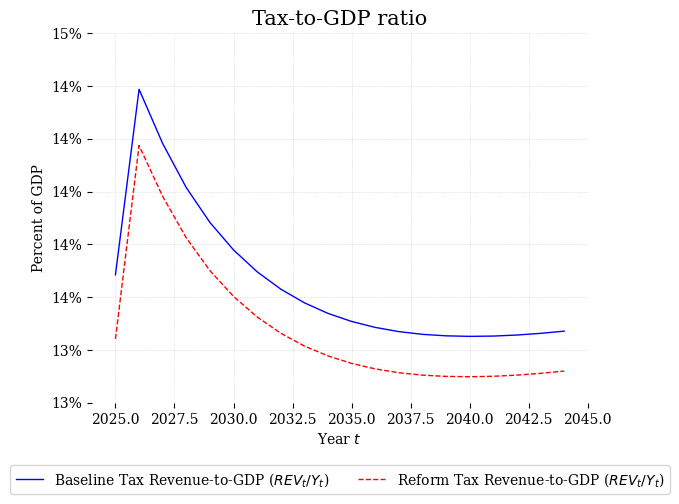

In [27]:
fig3 = op.plot_gdp_ratio(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var_list=["total_tax_revenue"], num_years_to_plot=20,
    start_year=p_bas.start_year, plot_type="levels",
    vertical_line_years=None,
    plot_title="Tax-to-GDP ratio"
)
fig1.savefig(os.path.join(plot_path,"tax_to_gdp_cit.png"),bbox_inches="tight",dpi=300)

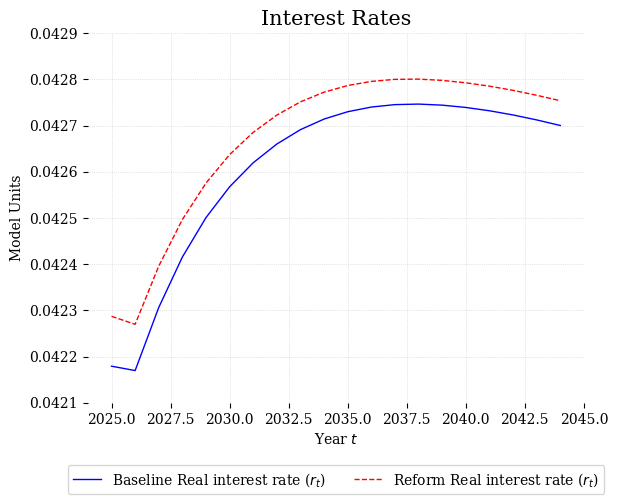

In [28]:
fig1 = op.plot_aggregates(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var_list=["r"],
    plot_type="levels", num_years_to_plot=20,
    vertical_line_years=None,
    plot_title="Interest Rates"
)
fig1.savefig(os.path.join(plot_path,"interest_cit.png"),bbox_inches="tight",dpi=300)

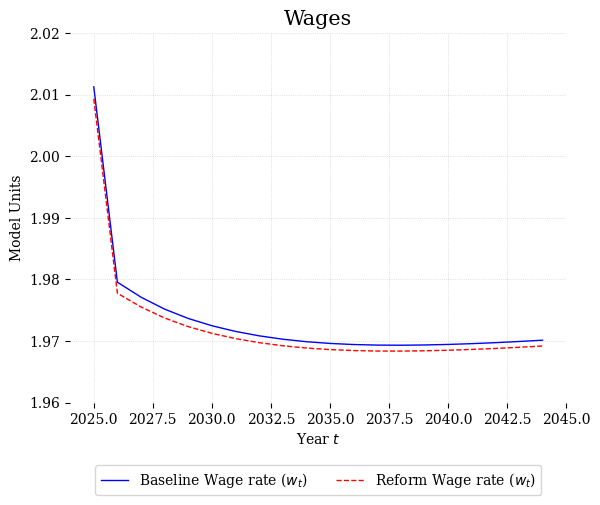

In [30]:
fig1 = op.plot_aggregates(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var_list=["w"],
    plot_type="levels", num_years_to_plot=20,
    vertical_line_years=None,
    plot_title="Wages")
fig1.savefig(os.path.join(plot_path,"wages_cit.png"),bbox_inches="tight",dpi=300)

Inequality time series plot [`inequality_plot()`](https://pslmodels.github.io/OG-Core/content/api/output_plots.html)

```python
inequality_plot(
    base_tpi,
    base_params,
    reform_tpi=None,
    reform_params=None,
    var="c_path",
    ineq_measure="gini",
    pctiles=None,
    plot_type="levels",
    num_years_to_plot=50,
    start_year=DEFAULT_START_YEAR,
    vertical_line_years=None,
    plot_title=None,
    path=None,
)
```

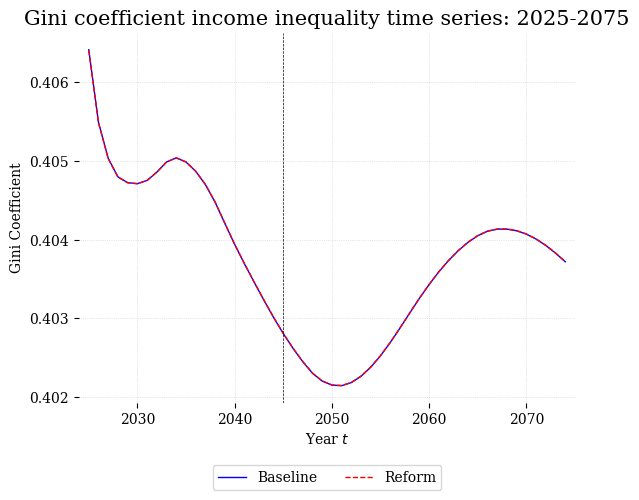

In [15]:
fig4 = op.inequality_plot(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var="before_tax_income",
    ineq_measure="gini", plot_type="levels", num_years_to_plot=50,
    start_year=p_bas.start_year,
    vertical_line_years=[p_bas.start_year + p_bas.tG1, p_bas.start_year + p_bas.tG2],
    plot_title="Gini coefficient income inequality time series: 2025-2075"
)

## 2. demographics.py

/opt/anaconda3/envs/ogidn-dev/lib/python3.12/site-packages/ogcore/parameter_plots.py:417: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


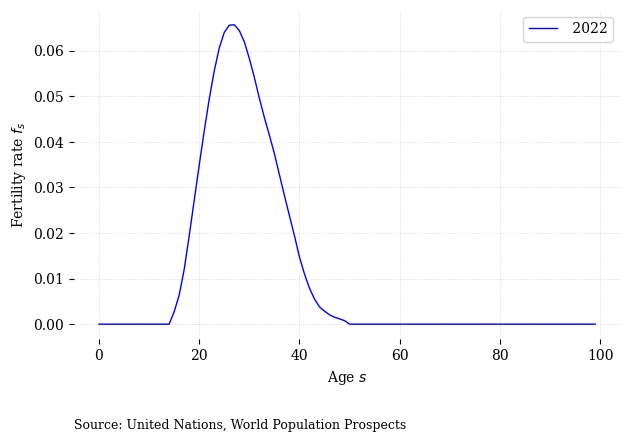

In [16]:
fert_rates, fig = demog.get_fert(
    totpers=100,
    min_age=0,
    max_age=99,
    country_id="360",  # Indonesia is "360"; South Africa is "710"; USA is "840"
    start_year=2022,
    end_year=2022,
    graph=True,
    plot_path=None,
    download_path=None,
)

/opt/anaconda3/envs/ogidn-dev/lib/python3.12/site-packages/ogcore/parameter_plots.py:417: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


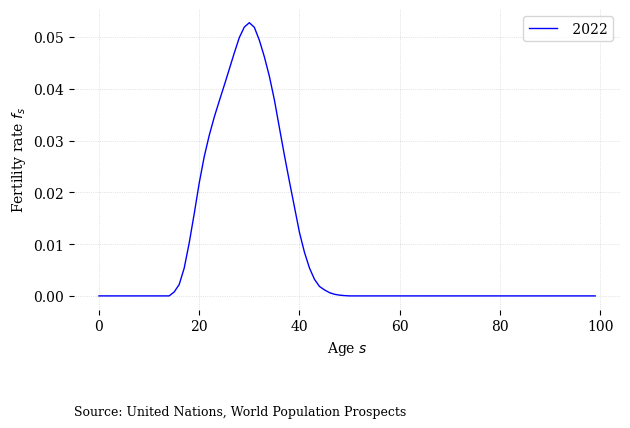

In [17]:
fert_rates, fig = demog.get_fert(
    totpers=100,
    min_age=0,
    max_age=99,
    country_id="840",  # South Africa is "710"; USA is "840"
    start_year=2022,
    end_year=2022,
    graph=True,
    plot_path=None,
    download_path=None,
)

/opt/anaconda3/envs/ogidn-dev/lib/python3.12/site-packages/ogcore/parameter_plots.py:467: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


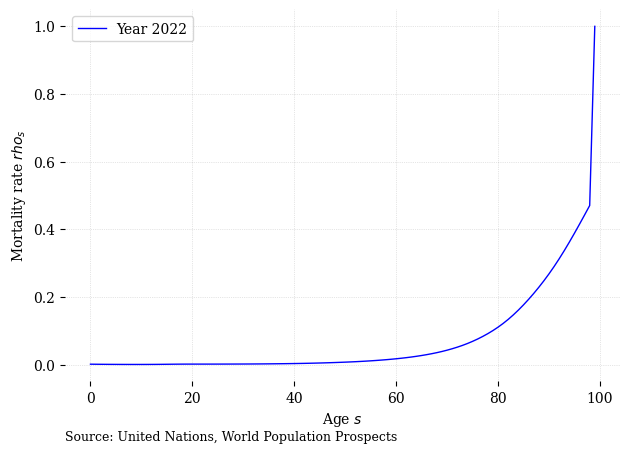

In [23]:
mort_rates_idn, inf_mort_idn, fig = demog.get_mort(
    totpers=100,
    min_age=0,
    max_age=99,
    country_id="360",  # Indonesia is "360"; South Africa is "710"; USA is "840"
    start_year=2022,
    end_year=2022,
    graph=True,
    plot_path=None,
    download_path=None,
)

/opt/anaconda3/envs/ogidn-dev/lib/python3.12/site-packages/ogcore/parameter_plots.py:467: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


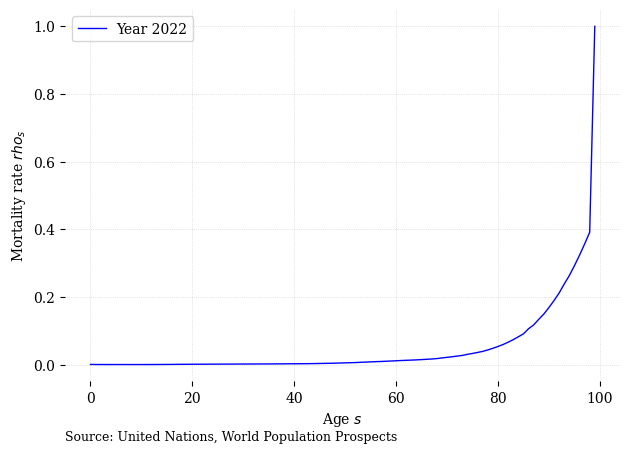

In [22]:
mort_rates_usa, inf_mort_usa, fig = demog.get_mort(
    totpers=100,
    min_age=0,
    max_age=99,
    country_id="840",  # Indonesia is "360"; South Africa is "710"; USA is "840"
    start_year=2022,
    end_year=2022,
    graph=True,
    plot_path=None,
    download_path=None,
)

/opt/anaconda3/envs/ogidn-dev/lib/python3.12/site-packages/ogcore/parameter_plots.py:467: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


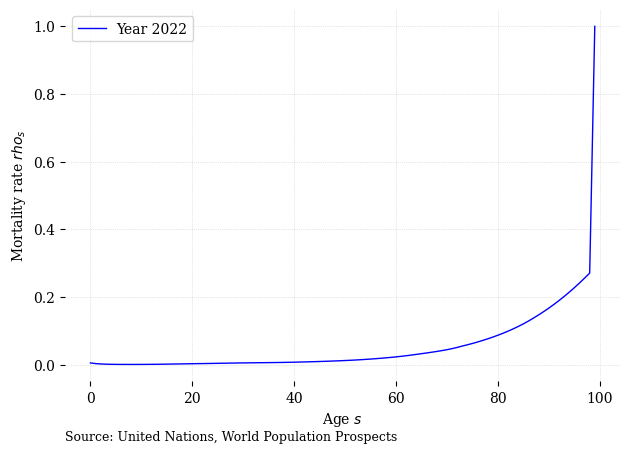

In [27]:
mort_rates_zaf, inf_mort_zaf, fig = demog.get_mort(
    totpers=100,
    min_age=0,
    max_age=99,
    country_id="710",  # Indonesia is "360"; South Africa is "710"; USA is "840"
    start_year=2022,
    end_year=2022,
    graph=True,
    plot_path=None,
    download_path=None,
)

/opt/anaconda3/envs/ogidn-dev/lib/python3.12/site-packages/ogcore/parameter_plots.py:467: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


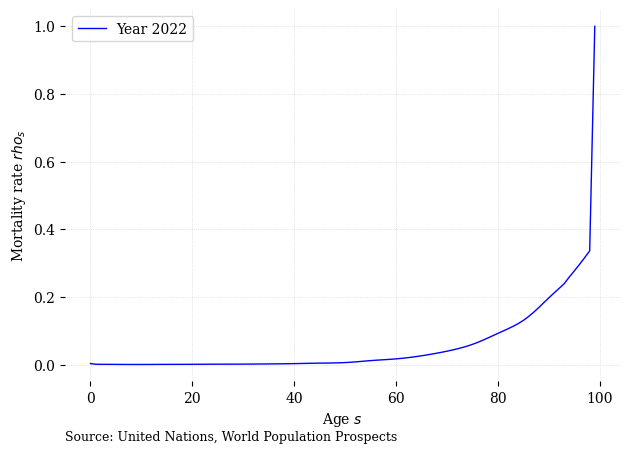

In [29]:
mort_rates_ind, inf_mort_ind, fig = demog.get_mort(
    totpers=100,
    min_age=0,
    max_age=99,
    country_id="356",  # Indonesia is "360"; South Africa is "710"; USA is "840"
    start_year=2022,
    end_year=2022,
    graph=True,
    plot_path=None,
    download_path=None,
)

/opt/anaconda3/envs/ogidn-dev/lib/python3.12/site-packages/ogcore/parameter_plots.py:467: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


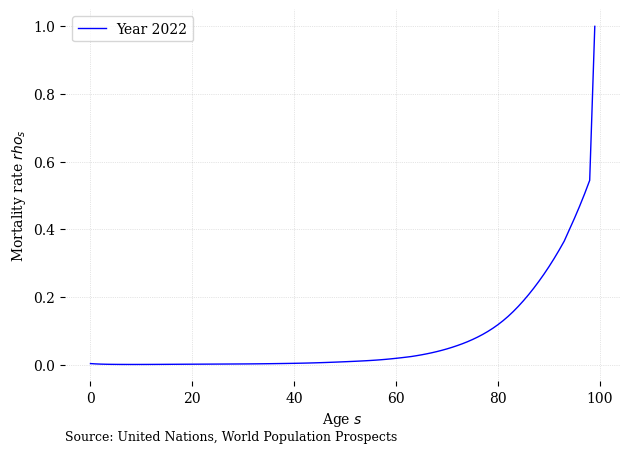

In [31]:
mort_rates_phl, inf_mort_phl, fig = demog.get_mort(
    totpers=100,
    min_age=0,
    max_age=99,
    country_id="608",  # Indonesia is "360"; South Africa is "710"; USA is "840"
    start_year=2022,
    end_year=2022,
    graph=True,
    plot_path=None,
    download_path=None,
)

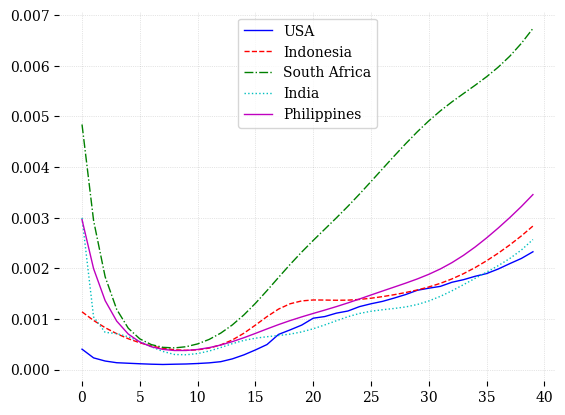

In [33]:
plt.plot(np.arange(40), mort_rates_usa[0,:40], label="USA")
plt.plot(np.arange(40), mort_rates_idn[0,:40], label="Indonesia")
plt.plot(np.arange(40), mort_rates_zaf[0,:40], label="South Africa")
plt.plot(np.arange(40), mort_rates_ind[0,:40], label="India")
plt.plot(np.arange(40), mort_rates_phl[0,:40], label="Philippines")
plt.legend()
plt.show()